# Data EDA

In [3]:
# Extensive Exploratory Data Analysis (EDA) and Preprocessing on Movie Dataset

# Import necessary libraries
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter

from wordcloud import WordCloud


# 1. Data Understanding

# Load datasets from the 'raw-data' folder
credits = pd.read_csv('./raw-data/credits.csv')
keywords = pd.read_csv('./raw-data/keywords.csv')
movies_metadata = pd.read_csv('./raw-data/movies_metadata.csv', low_memory=False)
ratings = pd.read_csv('./raw-data/ratings.csv')
links = pd.read_csv('./raw-data/links.csv')

In [4]:
# Initial Inspection

# Movies Metadata
print("Movies Metadata:")
display(movies_metadata.head())
movies_metadata.info()

Movies Metadata:


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [5]:

# Credits
print("Credits:")
display(credits.head())
credits.info()


Credits:


,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [6]:

# Keywords
print("Keywords:")
display(keywords.head())
keywords.info()


Keywords:


,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


In [7]:

# Ratings
print("Ratings:")
display(ratings.head())
ratings.info()


Ratings:


,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [8]:

# Links
print("Links:")
display(links.head())
links.info()


Links:


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45843 entries, 0 to 45842
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  45843 non-null  int64  
 1   imdbId   45843 non-null  int64  
 2   tmdbId   45624 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.0 MB


In [9]:

# 2. Data Preprocessing

# Parse JSON-like Columns

# Helper Function
def parse_json_column(df, column_name):
    """Safely parse JSON-like strings in a DataFrame column."""
    def parse_json(x):
        if pd.isna(x):
            return []
        try:
            return ast.literal_eval(x)
        except ValueError:
            return []
    df[column_name] = df[column_name].apply(parse_json)
    return df

# Parse Columns in Datasets
# Parse 'cast' and 'crew' in credits
credits = parse_json_column(credits, 'cast')
credits = parse_json_column(credits, 'crew')

# Parse 'keywords' in keywords
keywords = parse_json_column(keywords, 'keywords')

# Parse relevant columns in movies_metadata
json_columns = ['genres', 'production_companies', 'production_countries', 'spoken_languages', 'belongs_to_collection']
for column in json_columns:
    movies_metadata = parse_json_column(movies_metadata, column)

# Convert Data Types
# Convert appropriate columns to numeric
movies_metadata['id'] = pd.to_numeric(movies_metadata['id'], errors='coerce')
movies_metadata['budget'] = pd.to_numeric(movies_metadata['budget'], errors='coerce')
movies_metadata['revenue'] = pd.to_numeric(movies_metadata['revenue'], errors='coerce')
movies_metadata['popularity'] = pd.to_numeric(movies_metadata['popularity'], errors='coerce')
movies_metadata['vote_average'] = pd.to_numeric(movies_metadata['vote_average'], errors='coerce')
movies_metadata['vote_count'] = pd.to_numeric(movies_metadata['vote_count'], errors='coerce')

movies_metadata['release_date'] = pd.to_datetime(movies_metadata['release_date'], errors='coerce')

credits['id'] = pd.to_numeric(credits['id'], errors='coerce')
keywords['id'] = pd.to_numeric(keywords['id'], errors='coerce')

In [10]:

# 3. Handling Missing Values

# Identify Missing Values
# Check for missing values in movies_metadata
missing_movies = movies_metadata.isnull().sum()
print("Missing values in movies_metadata:")
print(missing_movies)

# Check for missing values in credits
missing_credits = credits.isnull().sum()
print("\nMissing values in credits:")
print(missing_credits)

# Check for missing values in keywords
missing_keywords = keywords.isnull().sum()
print("\nMissing values in keywords:")
print(missing_keywords)

# Handling Missing Values

# For numerical columns, fill missing values with median or 0
movies_metadata['budget'] = movies_metadata['budget'].fillna(0)
movies_metadata['revenue'] = movies_metadata['revenue'].fillna(0)
movies_metadata['popularity'] = movies_metadata['popularity'].fillna(movies_metadata['popularity'].median())
movies_metadata['vote_average'] = movies_metadata['vote_average'].fillna(movies_metadata['vote_average'].median())
movies_metadata['vote_count'] = movies_metadata['vote_count'].fillna(0)

# For release_date, we can drop rows with missing dates as date is crucial for time series
movies_metadata = movies_metadata.dropna(subset=['release_date'])

# Ensure 'cast' and 'crew' are filled with empty lists if missing
credits['cast'] = credits['cast'].apply(lambda x: x if isinstance(x, list) else [])
credits['crew'] = credits['crew'].apply(lambda x: x if isinstance(x, list) else [])
keywords['keywords'] = keywords['keywords'].apply(lambda x: x if isinstance(x, list) else [])



Missing values in movies_metadata:
adult                        0
belongs_to_collection        0
budget                       3
genres                       0
homepage                 37684
id                           3
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   6
poster_path                386
production_companies         0
production_countries         0
release_date                90
revenue                      6
runtime                    263
spoken_languages             0
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

Missing values in credits:
cast    0
crew    0
id      0
dtype: int64

Missing values in keywords:
id          0
keywords    0
dtype: int64


Descriptive Statistics for Numerical Features:


,budget,revenue,popularity,vote_average,vote_count
count,4.537600e+04,4.537600e+04,45376.000000,45376.000000,45376.000000
mean,4.232604e+06,1.123010e+07,2.926458,5.624070,110.096439
std,1.743986e+07,6.438996e+07,6.009672,1.915423,491.742894
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.388840,5.000000,3.000000
50%,0.000000e+00,0.000000e+00,1.130454,6.000000,10.000000
75%,0.000000e+00,0.000000e+00,3.691695,6.800000,34.000000
max,3.800000e+08,2.787965e+09,547.488298,10.000000,14075.000000


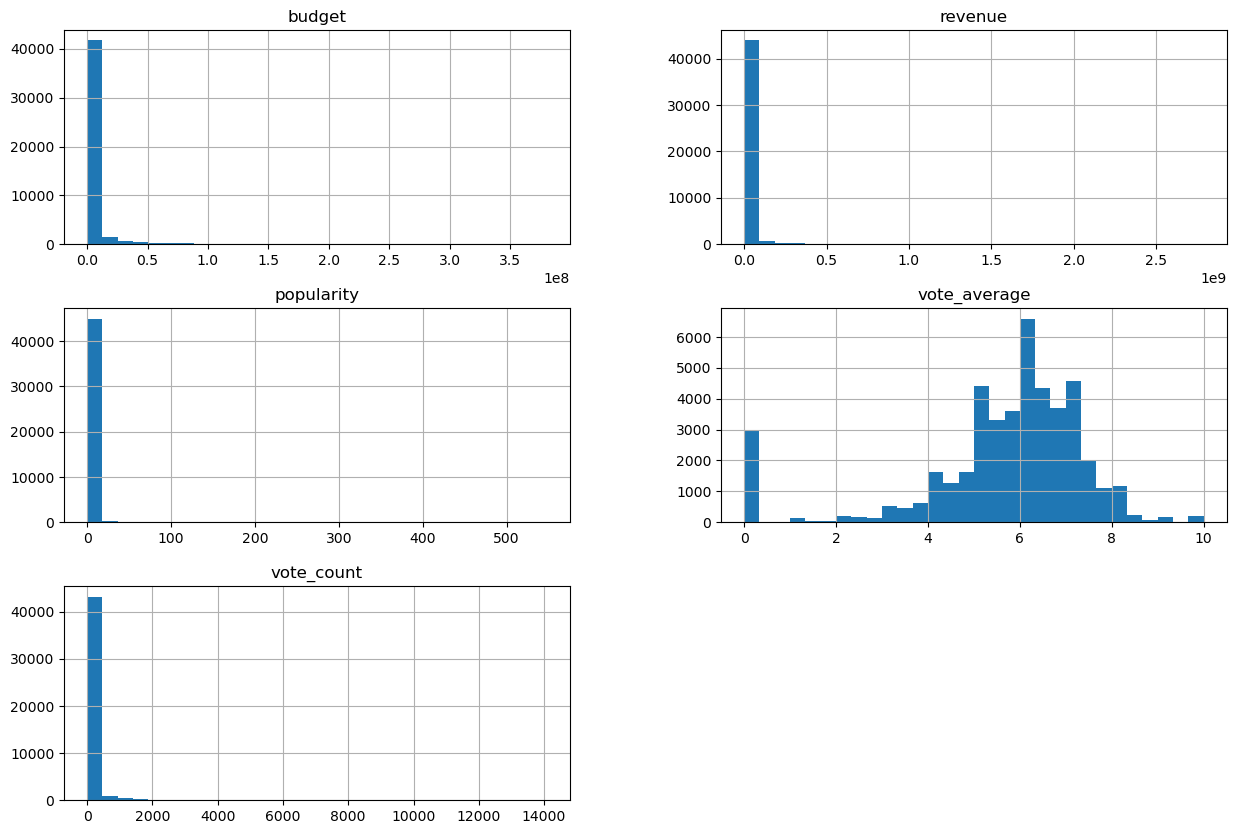

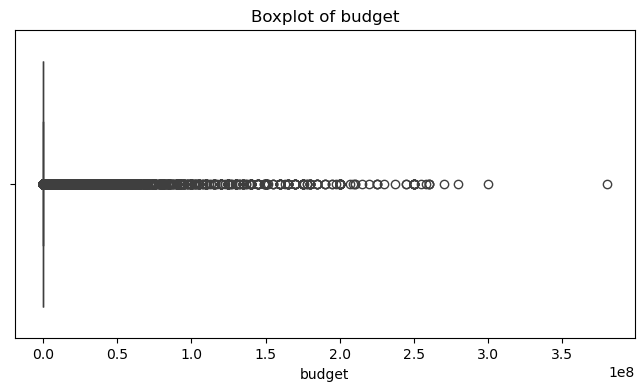

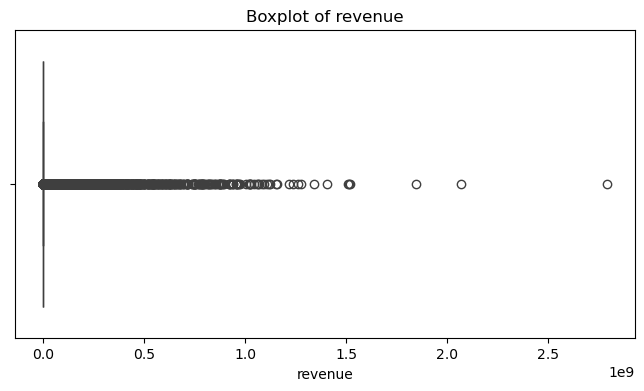

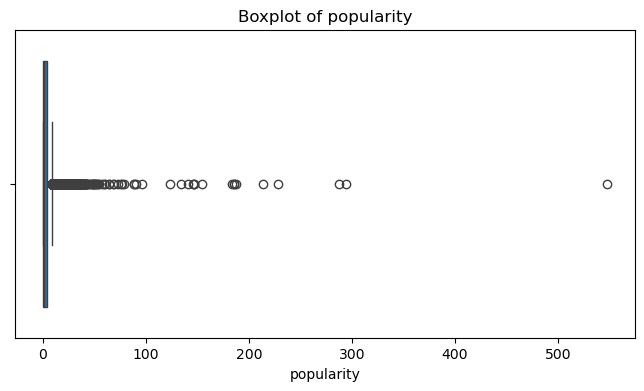

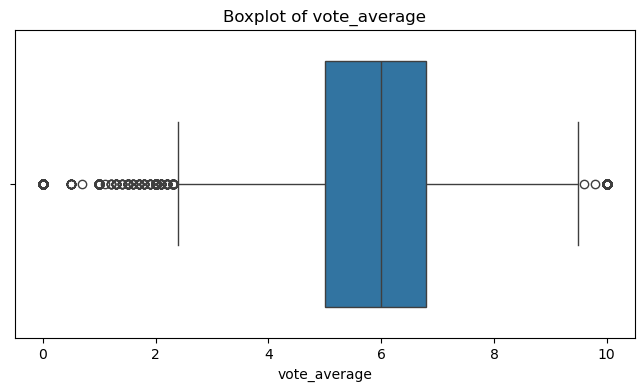

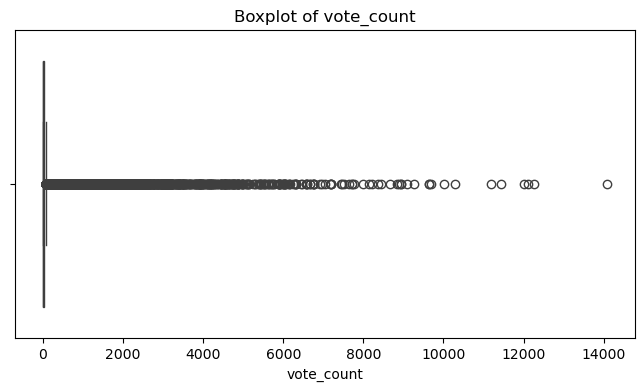

In [11]:
# 4. Statistical Analysis of Numerical Features

# Descriptive Statistics
# Numerical columns in movies_metadata
numerical_cols = ['budget', 'revenue', 'popularity', 'vote_average', 'vote_count']

print("Descriptive Statistics for Numerical Features:")
display(movies_metadata[numerical_cols].describe())

# Distribution Plots

# Histograms
# Histograms for numerical features
movies_metadata[numerical_cols].hist(bins=30, figsize=(15,10))
plt.show()

# Boxplots
# Boxplots to identify outliers
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=movies_metadata[col])
    plt.title(f'Boxplot of {col}')
    plt.show()



In [12]:
# 5. Outlier Detection and Handling

# Identify Outliers Using IQR
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_step = 1.5 * IQR
    outliers = data[(data[column] < Q1 - outlier_step) | (data[column] > Q3 + outlier_step)]
    return outliers

# Detect outliers in 'budget'
outliers_budget = detect_outliers_iqr(movies_metadata, 'budget')
print(f"Number of outliers in 'budget': {len(outliers_budget)}")

# Handle Outliers

# Capping outliers
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    return data

# Apply capping to 'budget' and 'revenue'
movies_metadata = cap_outliers(movies_metadata, 'budget')
movies_metadata = cap_outliers(movies_metadata, 'revenue')

# Alternatively, we can apply log transformation
# Log transformation to reduce skewness
movies_metadata['log_budget'] = np.log1p(movies_metadata['budget'])
movies_metadata['log_revenue'] = np.log1p(movies_metadata['revenue'])



Number of outliers in 'budget': 8886


In [13]:
# 6. Categorical Feature Analysis

# Extract Categorical Data

# Genres
# Extract genre names
movies_metadata['genres_list'] = movies_metadata['genres'].apply(lambda x: [d['name'] for d in x] if isinstance(x, list) else [])

# Count genres
genre_counts = Counter([genre for genres in movies_metadata['genres_list'] for genre in genres])
print("Top Genres:")
print(genre_counts.most_common(10))

# Production Companies
# Extract production company names
movies_metadata['production_companies_list'] = movies_metadata['production_companies'].apply(lambda x: [d['name'] for d in x] if isinstance(x, list) else [])

# Count production companies
company_counts = Counter([company for companies in movies_metadata['production_companies_list'] for company in companies])
print("Top Production Companies:")
print(company_counts.most_common(10))

# Original Language
# Original language counts
language_counts = movies_metadata['original_language'].value_counts()
print("Original Language Counts:")
print(language_counts)



Top Genres:
[('Drama', 20255), ('Comedy', 13181), ('Thriller', 7619), ('Romance', 6733), ('Action', 6592), ('Horror', 4670), ('Crime', 4305), ('Documentary', 3921), ('Adventure', 3494), ('Science Fiction', 3042)]
Top Production Companies:
[('Warner Bros.', 1250), ('Metro-Goldwyn-Mayer (MGM)', 1076), ('Paramount Pictures', 1003), ('Twentieth Century Fox Film Corporation', 836), ('Universal Pictures', 830), ('Columbia Pictures Corporation', 448), ('Canal+', 438), ('Columbia Pictures', 431), ('RKO Radio Pictures', 290), ('United Artists', 279)]
Original Language Counts:
original_language
en    32202
fr     2437
it     1528
ja     1349
de     1078
      ...  
uz        1
mt        1
hy        1
lb        1
si        1
Name: count, Length: 89, dtype: int64


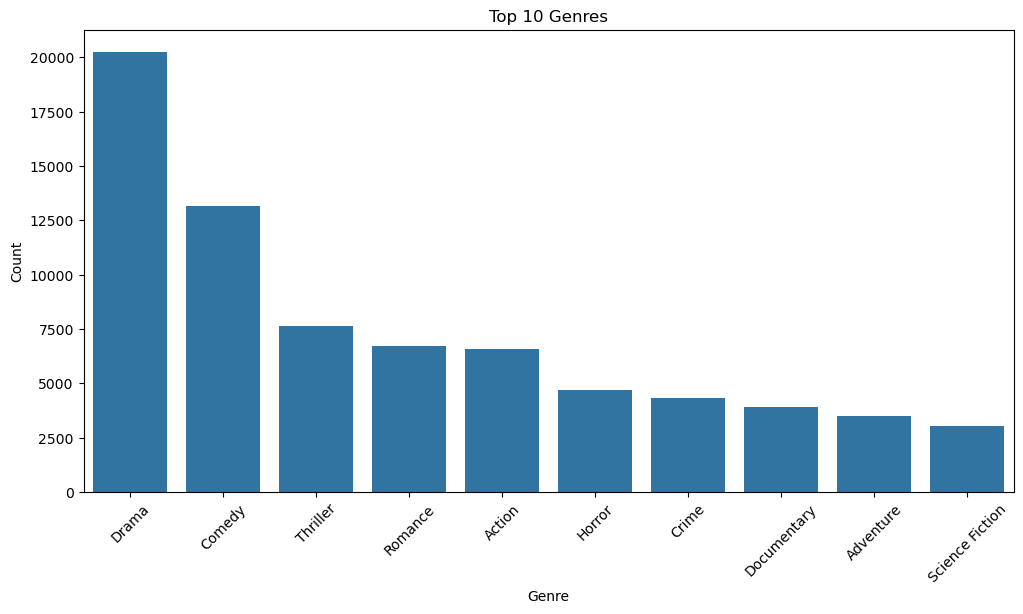

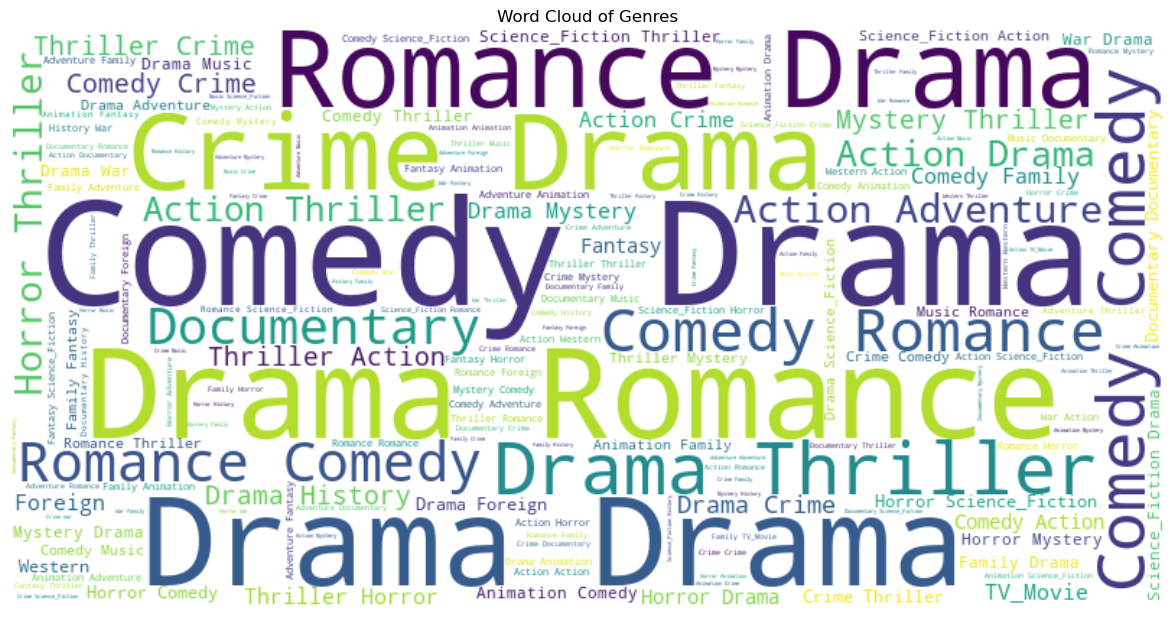

In [14]:
# Visualize Categorical Data

# Bar Plots

# Bar plot for top genres
top_genres = genre_counts.most_common(10)
genres, counts = zip(*top_genres)
plt.figure(figsize=(12,6))
sns.barplot(x=list(genres), y=list(counts))
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Word Clouds


# Generate word cloud for genres
genre_text = ' '.join([genre.replace(' ', '_') for genres in movies_metadata['genres_list'] for genre in genres])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genre_text)

plt.figure(figsize=(15,7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Genres')
plt.show()



In [15]:
# 7. Feature Engineering

# Create New Features

# Total Number of Genres
movies_metadata['num_genres'] = movies_metadata['genres_list'].apply(len)

# Main Production Country
movies_metadata['main_production_country'] = movies_metadata['production_countries'].apply(
    lambda x: x[0]['iso_3166_1'] if isinstance(x, list) and len(x) > 0 else 'Unknown'
)

# Has Collection
movies_metadata['has_collection'] = movies_metadata['belongs_to_collection'].apply(
    lambda x: 1 if isinstance(x, dict) else 0
)



In [16]:
# 8. Data Transformation and Encoding

# Encoding Categorical Variables

# Label Encoding

# Label encode original language
le_language = LabelEncoder()
movies_metadata['original_language_encoded'] = le_language.fit_transform(movies_metadata['original_language'])

# One-Hot Encoding

# For genres
from sklearn.preprocessing import MultiLabelBinarizer

mlb_genres = MultiLabelBinarizer()
genres_encoded = mlb_genres.fit_transform(movies_metadata['genres_list'])
genres_encoded_df = pd.DataFrame(genres_encoded, columns=mlb_genres.classes_, index=movies_metadata.index)

# Merge with main DataFrame
movies_metadata = pd.concat([movies_metadata, genres_encoded_df], axis=1)

# Frequency Encoding

# For high cardinality variables like production companies
# Frequency encoding for production companies
company_freq = company_counts
movies_metadata['production_company_freq'] = movies_metadata['production_companies_list'].apply(
    lambda x: sum(company_freq.get(company, 0) for company in x)
)

# Scaling Numerical Features

# StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
movies_metadata['scaled_popularity'] = scaler.fit_transform(movies_metadata[['popularity']])
movies_metadata['scaled_vote_average'] = scaler.fit_transform(movies_metadata[['vote_average']])

# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
movies_metadata['scaled_budget'] = minmax_scaler.fit_transform(movies_metadata[['budget']])
movies_metadata['scaled_revenue'] = minmax_scaler.fit_transform(movies_metadata[['revenue']])

# RobustScaler
# For features with outliers
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
movies_metadata['scaled_log_budget'] = robust_scaler.fit_transform(movies_metadata[['log_budget']])
movies_metadata['scaled_log_revenue'] = robust_scaler.fit_transform(movies_metadata[['log_revenue']])



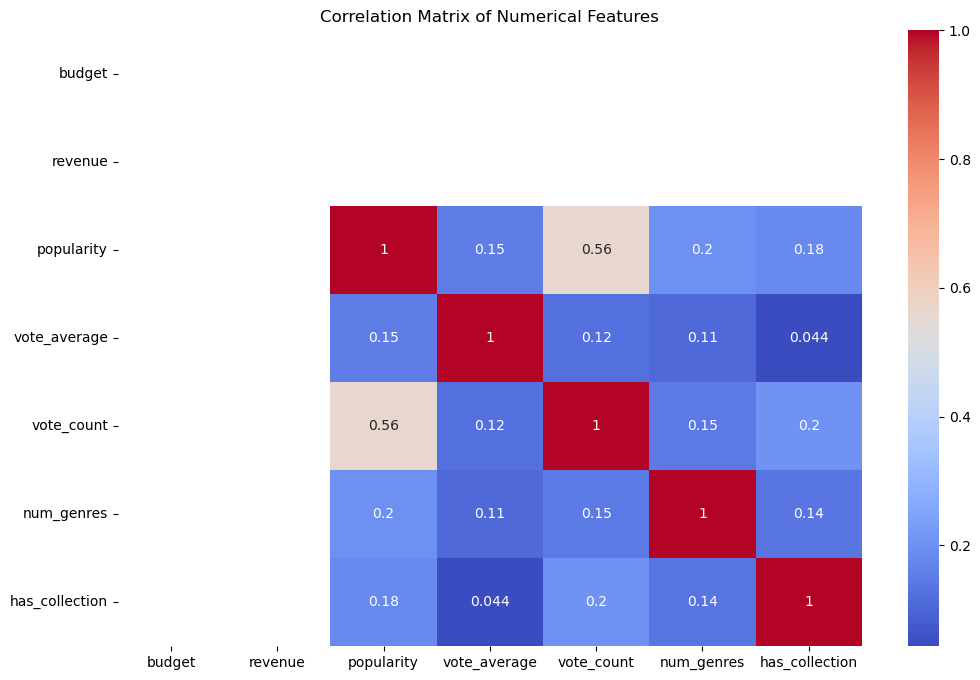

In [17]:
# 9. Correlation Analysis

# Correlation Matrix

# Select numerical features
numerical_features = ['budget', 'revenue', 'popularity', 'vote_average', 'vote_count', 'num_genres', 'has_collection']

# Compute correlation matrix
corr_matrix = movies_metadata[numerical_features].corr()

# Display heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()



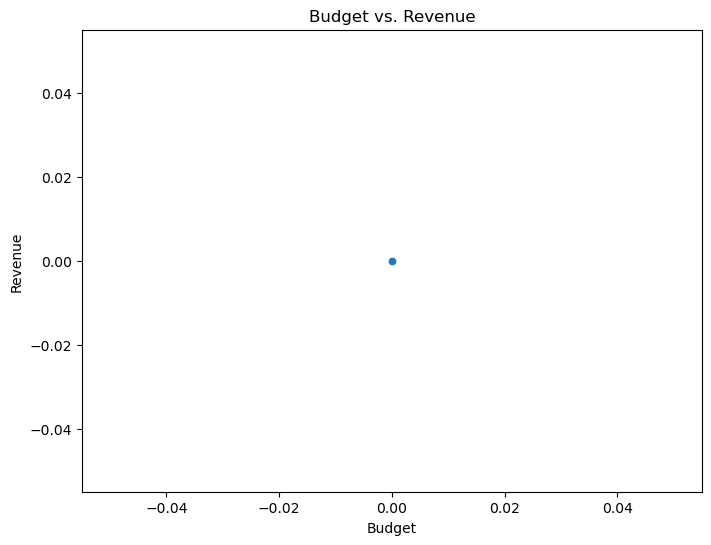

In [ ]:
# 10. Data Visualization

# Scatter Plots

# Budget vs. Revenue
plt.figure(figsize=(8,6))
sns.scatterplot(x='budget', y='revenue', data=movies_metadata)
plt.title('Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

# Popularity over Time
plt.figure(figsize=(12,6))
sns.lineplot(x='release_date', y='popularity', data=movies_metadata.sort_values('release_date'))
plt.title('Movie Popularity Over Time')
plt.xlabel('Release Date')
plt.ylabel('Popularity')
plt.show()

# Distribution of Ratings
plt.figure(figsize=(8,6))
sns.histplot(movies_metadata['vote_average'], bins=20, kde=True)
plt.title('Distribution of Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()



In [ ]:
# 11. Advanced EDA

# Time Series Analysis

# Number of Movies Released Per Year
movies_metadata['release_year'] = movies_metadata['release_date'].dt.year
movies_per_year = movies_metadata['release_year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values)
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

# Trends in Genres Over Time
# Explode genres_list
movies_genres = movies_metadata[['release_year', 'genres_list']].explode('genres_list')

# Group by year and genre
genre_trends = movies_genres.groupby(['release_year', 'genres_list']).size().reset_index(name='count')

# Pivot for heatmap
genre_pivot = genre_trends.pivot(index='release_year', columns='genres_list', values='count').fillna(0)

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(genre_pivot.T, cmap='YlGnBu')
plt.title('Genre Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Genre')
plt.show()



In [ ]:
# 12. Preparing Data for Modeling

# Feature Selection

# Decide which features to include in the model based on EDA findings.

# Final Data Preparation

# Handle any remaining missing values.
# Encode categorical variables.
# Scale numerical variables.
# Split data into training and testing sets.

# Example of final dataset
final_features = ['scaled_log_budget', 'scaled_log_revenue', 'scaled_popularity', 'scaled_vote_average',
                  'num_genres', 'has_collection', 'original_language_encoded'] + list(genres_encoded_df.columns)

# Final dataset
X = movies_metadata[final_features]
y = movies_metadata['revenue']  # Or another target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)